# <span style="font-family:Cooper Black">Rebuke and Acceptance as Workers Machine Learning Model Project

### Build by : <font color='blue'>Dimas Brahmantyo (https://github.com/dimasbramski472)</font>

## <font color='red'> Problems:
    
<font color='black'>The HRD team from the "GRGT" company wants to create a predictive model system using Machine Learning in Python to determine based on work performance, whether an employee needs to be given a warning / rebuke (in the case of full time employees) and which interns will be appointed as permanent employees.

### The libraries used in this test are:

* `pandas` is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

* `NumPy` which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

* `Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

* `Seaborn` has a similar function to Matplotlib. It provides higher-level interface for drawing attractive and informative statistical graphics than Matplotlib.

* `Warnings` Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Understanding the Data

The analyzed data file is in the form of .csv, and consists of 31 columns including:
* `Age` = Age of employee
* `Education` = The last education level of the employee
* `ForeignEmployee` = Indicates whether the employee is from overseas (1) or not (0)
* `Male` = Indicates whether the gender of the employee is male (1) or female (0)
* `DistanceFromHome` = Distance between the employee's residence and the office
* `Department` = Origin of employee's department
* `Division` = Origin of employee department division
* `DailyIncome` = Employee daily salary
* `MonthlyIncome` = Employee's monthly salary
* `EmployeeCount` = If it is worth 1, the meal includes company employees. Apart from that it is not included.
* `EmployeeKeyNumber` = Key number of employee
* `NumberofCompany` = Number of companies where employees work
* `YearInCurrentRole` = Length of time the employee has held the current position
* `EnvironmentSatisfaction` = The level of comfort of employees with their work environment. The scale is as follows:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

* `JobInvolvement` = Scale of employee activity level in carrying out work / projects. The scale is as follows:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
* `JobSatisfaction` = Scale of employee satisfaction level with his current job. The scale is as follows:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
* `PerformanceRating` = Average value of employee performance at work. The higher the value the better
* `RelationshipSatisfaction` = Scale of employee relations with colleagues. The scale is as follows:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
* `TrainingThisYear` = Number of career trainings attended by employees this year
* `YearsWithCurrManager` = Length of time employees work with their Division Manager
* `WorkLifeBalance` = The level of employees' ability to balance their responsibilities at work and non-work related matters. The scale is as follows:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
* `AverageLatenessPerMonth` = Average time delay of employees arriving at work per month.
* `TotalOvertimePerWeek` = Number of overtime employees in 1 week.
* `PersonalScore` = Total personal assessment of employees using calculations from JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, and WorkLifeBalance

* `PerformanceTotalScore` = Total employee performance appraisal using PerformanceRating data multiplied by JobInvolvement, TrainingThisYear, and TotalOvertimePerWeek
* `Indisciplinary` = The amount of reduction in score points due to being late at work (AverageLatenessPerMonth) which is affected by the distance between the employee's residence and the workplace.
* `Rebuke`  = Indicates whether full-time employees get rebuke.
* `AcceptedAsEmployee` = Indicates whether interns get accepted as company employee.

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ML_Model_Testing.csv")
data

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,JobType,DailyIncome,MonthIncome,...,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,Rebuke,AcceptedAsEmployee
0,25,Bachelor,0,1,23,Research & Analytics,Data Scientist Intern,Internship,185579,3878601,...,1,4,17,1,84.00,77.4250,-7.65,51.258333,False,True
1,22,Bachelor,0,1,39,IT,Front End Developer Intern,Internship,305775,6390698,...,0,3,30,3,73.75,71.2500,-18.00,42.333333,False,True
2,22,Bachelor,0,0,35,IT,Front End Developer,Full Time,440492,9206283,...,0,4,26,0,86.00,49.2750,-6.50,42.925000,False,False
3,20,College,0,0,11,IT,Back End Developer Intern,Internship,295640,6178876,...,1,3,2,2,78.00,62.5625,0.00,46.854167,False,True
4,25,Bachelor,0,0,47,Digital Marketing,Copywriter Intern,Internship,161812,3381871,...,1,2,54,2,62.25,48.8375,-32.40,26.229167,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,28,Below College,0,0,1,Service & Hospitality,Cleaning Service,Full Time,182827,3821084,...,2,3,29,0,86.25,34.2000,-13.05,35.800000,True,False
2135,27,Bachelor,0,1,18,IT,UI/UX Developer,Full Time,421240,8803916,...,0,1,21,3,75.25,61.6125,-9.45,42.470833,False,False
2136,27,Bachelor,1,0,39,Digital Marketing,Graphic Designer,Full Time,220212,4602431,...,3,4,37,1,67.50,60.9250,-22.20,35.408333,True,False
2137,26,Bachelor,0,0,17,IT,Back End Developer Intern,Internship,302946,6331571,...,1,1,58,2,49.75,49.0625,-46.40,17.470833,False,False


## A. Rebuke Learning Model For Full-Time Workers

### <font color='green'>1. Data Pre-processing
    a. Filtering the Data where only Full time workers in the data and delete unnecessary data
    b. Data Exploration
    c. Missing Value Data Checking
    d. Data Conversion into Numerical Values
    e. Scaling Data
    f. Showing Correlation between each data
    g. Data Visualizing
### <font color='green'>2. Predictive Model Training & Testing
    a. Model Features and Labels
    b. Determining Training and Testing Dataset
    c. Training Model using Classifier
    d. Evaluate Predictive Data Using Confusion Matrix
    e. Show Prediction Result Data with Classification Report

### a. Filtering the data where only full time workers in the data and delete unnecessary data

In [4]:
data1 = data[data["JobType"] == "Full Time"]
data1 = data1.drop(["AcceptedAsEmployee","EmployeeCount","JobType","EmployeeKeyNumber"], axis = 1)
data1

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,Rebuke
2,22,Bachelor,0,0,35,IT,Front End Developer,440492,9206283,2,...,0,0,4,26,0,86.00,49.2750,-6.50,42.925000,False
7,30,Bachelor,0,0,50,Digital Marketing,Graphic Designer,217878,4553650,3,...,2,1,3,15,3,85.00,82.4250,-3.75,54.558333,False
8,29,Bachelor,0,1,26,Digital Marketing,Copywriter & SEO Manager,465004,9718584,4,...,4,1,4,0,0,72.00,50.0625,0.00,40.687500,True
9,22,Bachelor,1,0,25,Research & Analytics,Research & Development Jr. Consultant,260900,5452810,4,...,0,0,2,22,2,80.25,44.8250,-5.50,39.858333,True
12,24,Bachelor,0,0,29,Digital Marketing,SEO Specialist,316091,6606302,3,...,4,1,2,38,3,75.50,91.5000,-22.80,48.066667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,27,Bachelor,1,1,58,Research & Analytics,Data Scientist,339906,7104035,1,...,4,3,3,35,2,48.75,48.7625,-21.00,25.504167,True
2134,28,Below College,0,0,1,Service & Hospitality,Cleaning Service,182827,3821084,1,...,0,2,3,29,0,86.25,34.2000,-13.05,35.800000,True
2135,27,Bachelor,0,1,18,IT,UI/UX Developer,421240,8803916,1,...,3,0,1,21,3,75.25,61.6125,-9.45,42.470833,False
2136,27,Bachelor,1,0,39,Digital Marketing,Graphic Designer,220212,4602431,1,...,2,3,4,37,1,67.50,60.9250,-22.20,35.408333,True


### b. Data Exploration

Knowing Information, description of data form, and size of data using .info(), .describe(), and .size functions from pandas.

In [80]:
print("Dataset Information:\n", data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 2 to 2138
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   float64
 1   Education                 1319 non-null   int32  
 2   ForeignEmployee           1319 non-null   int64  
 3   Male                      1319 non-null   int64  
 4   DistanceFromHome          1319 non-null   float64
 5   Department                1319 non-null   float64
 6   Division                  1319 non-null   float64
 7   DailyIncome               1319 non-null   float64
 8   MonthIncome               1319 non-null   float64
 9   NumberofCompany           1319 non-null   float64
 10  EnvironmentSatisfaction   1319 non-null   float64
 11  YearInCompany             1319 non-null   float64
 12  YearInCurrentRole         1319 non-null   float64
 13  JobInvolvement            1319 non-null   float64
 14  JobSatis

In [81]:
print("Dataset Descriptive Statistic:\n", data1.describe())

Dataset Descriptive Statistic:
                Age    Education  ForeignEmployee         Male  \
count  1319.000000  1319.000000      1319.000000  1319.000000   
mean      0.288463     0.435936         0.139500     0.487491   
std       0.164366     0.841965         0.346599     0.500033   
min       0.000000     0.000000         0.000000     0.000000   
25%       0.172414     0.000000         0.000000     0.000000   
50%       0.275862     0.000000         0.000000     0.000000   
75%       0.379310     0.000000         0.000000     1.000000   
max       1.000000     3.000000         1.000000     1.000000   

       DistanceFromHome   Department     Division  DailyIncome  MonthIncome  \
count       1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean           0.490996     0.330048     0.571401     0.178481     0.178481   
std            0.296092     0.305195     0.318734     0.112190     0.112190   
min            0.000000     0.000000     0.000000     0.000000    

In [82]:
print("Dataset Size:\n", data1.shape)

Dataset Size:
 (1319, 27)


### c. Missing Value Data Checking

Checks whether the data is missing value in the data using the total result of the .isnull() function.

In [6]:
print("Total Missing Value:\n", data1.isnull().sum().sum())

Total Missing Value:
 0


### d. Data Conversion into Numerical Values

As shown from the results of the description of the data form, there are several columns that still use object or boolean forms, such as 'Education', 'Department', 'Division', and the actual 'Rebuke' data. Because predicting the results of the data model requires numerical data, the LabelEncoder function from the sklearn preprocessing sub-library is used.

In [7]:
# Convert feature/column 'Education', 'Department', 'Division', and 'Rebuke'
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data1['Education'] = LE.fit_transform(data1['Education'])
print(LE.classes_)
print(np.sort(data1['Education'].unique()))

['Bachelor' 'Below College' 'College' 'Master']
[0 1 2 3]


In [8]:
data1['Department'] = LE.fit_transform(data1['Department'])
print(LE.classes_)
print(np.sort(data1['Department'].unique()))

['Digital Marketing' 'IT' 'Research & Analytics' 'Service & Hospitality']
[0 1 2 3]


In [9]:
data1['Rebuke'] = LE.fit_transform(data1['Rebuke'])
print(LE.classes_)
print(np.sort(data1['Rebuke'].unique()))

[False  True]
[0 1]


In [10]:
data1['Division'] = LE.fit_transform(data1['Division'])
print(LE.classes_)
print(np.sort(data1['Division'].unique()))

['Back End Developer' 'Back End Developer Manager' 'Cleaning Service'
 'Content & Social Media Marketing Manager' 'Content Strategist'
 'Copywriter' 'Copywriter & SEO Manager' 'Data Analyst' 'Data Cleaner'
 'Data Engineer' 'Data Entry' 'Data Manager' 'Data Scientist'
 'Digital Marketer' 'Digital Marketing Manager' 'Front End Developer'
 'Front End Developer Manager' 'Graphic Designer' 'Head of Sercurity'
 'Head of Service & Hospitality Department' 'IT Team Manager'
 'Project & Creative' 'Receptionist'
 'Research & Development Assosiate Consultant'
 'Research & Development Jr. Consultant' 'Research & Development Manager'
 'SEO Specialist' 'Security' 'Social Media Admin'
 'Social Media Specialist' 'UI/UX Developer' 'Web Developer']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [11]:
#Show the Dataset after Conversion

data1

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,Rebuke
2,22,0,0,0,35,1,15,440492,9206283,2,...,0,0,4,26,0,86.00,49.2750,-6.50,42.925000,0
7,30,0,0,0,50,0,17,217878,4553650,3,...,2,1,3,15,3,85.00,82.4250,-3.75,54.558333,0
8,29,0,0,1,26,0,6,465004,9718584,4,...,4,1,4,0,0,72.00,50.0625,0.00,40.687500,1
9,22,0,1,0,25,2,24,260900,5452810,4,...,0,0,2,22,2,80.25,44.8250,-5.50,39.858333,1
12,24,0,0,0,29,0,26,316091,6606302,3,...,4,1,2,38,3,75.50,91.5000,-22.80,48.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,27,0,1,1,58,2,12,339906,7104035,1,...,4,3,3,35,2,48.75,48.7625,-21.00,25.504167,1
2134,28,1,0,0,1,3,2,182827,3821084,1,...,0,2,3,29,0,86.25,34.2000,-13.05,35.800000,1
2135,27,0,0,1,18,1,30,421240,8803916,1,...,3,0,1,21,3,75.25,61.6125,-9.45,42.470833,0
2136,27,0,1,0,39,0,17,220212,4602431,1,...,2,3,4,37,1,67.50,60.9250,-22.20,35.408333,1


### e. Scaling Data

After converting non-numeric data to numeric, we need to perform data scaling so that there is no data dominance due to data values that have different ranges of values so that the predictive data results are inaccurate.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaling_column = ["Age","DistanceFromHome","Department","Division","DailyIncome","MonthIncome","NumberofCompany","EnvironmentSatisfaction","YearInCompany","YearInCurrentRole","JobInvolvement","JobSatisfaction","PerformanceRating","RelationshipSatisfaction","TrainingThisYear","YearsWithCurrManager","WorkLifeBalance","TotalOvertimePerWeek","AverageLatenessPerMonth","PersonalScore","PerformanceTotalScore","Indisciplinary","MainScore"]
data1[scaling_column] = scaler.fit_transform(data1[scaling_column])
print(data1[scaling_column].describe().T[['min','max']])

                          min  max
Age                       0.0  1.0
DistanceFromHome          0.0  1.0
Department                0.0  1.0
Division                  0.0  1.0
DailyIncome               0.0  1.0
MonthIncome               0.0  1.0
NumberofCompany           0.0  1.0
EnvironmentSatisfaction   0.0  1.0
YearInCompany             0.0  1.0
YearInCurrentRole         0.0  1.0
JobInvolvement            0.0  1.0
JobSatisfaction           0.0  1.0
PerformanceRating         0.0  1.0
RelationshipSatisfaction  0.0  1.0
TrainingThisYear          0.0  1.0
YearsWithCurrManager      0.0  1.0
WorkLifeBalance           0.0  1.0
TotalOvertimePerWeek      0.0  1.0
AverageLatenessPerMonth   0.0  1.0
PersonalScore             0.0  1.0
PerformanceTotalScore     0.0  1.0
Indisciplinary            0.0  1.0
MainScore                 0.0  1.0


In [50]:
data1

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,Rebuke
2,0.172414,0,0,0,0.492754,0.333333,0.483871,0.287582,0.287582,0.166667,...,0.00,0.000000,1.000000,0.619048,0.000000,0.756849,0.387713,0.806548,0.593316,0
7,0.448276,0,0,0,0.710145,0.000000,0.548387,0.085891,0.085891,0.333333,...,0.50,0.166667,0.666667,0.357143,1.000000,0.743151,0.844089,0.888393,0.846880,0
8,0.413793,0,0,1,0.362319,0.000000,0.193548,0.309790,0.309790,0.500000,...,1.00,0.166667,1.000000,0.000000,0.000000,0.565068,0.398554,1.000000,0.544546,1
9,0.172414,0,1,0,0.347826,0.666667,0.774194,0.124870,0.124870,0.500000,...,0.00,0.000000,0.333333,0.523810,0.666667,0.678082,0.326450,0.836310,0.526474,1
12,0.241379,0,0,0,0.405797,0.000000,0.838710,0.174873,0.174873,0.333333,...,1.00,0.166667,0.333333,0.904762,1.000000,0.613014,0.969024,0.321429,0.705386,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,0.344828,0,1,1,0.826087,0.666667,0.387097,0.196450,0.196450,0.000000,...,1.00,0.500000,0.666667,0.833333,0.666667,0.246575,0.380657,0.375000,0.213605,1
2134,0.379310,1,0,0,0.000000,1.000000,0.064516,0.054135,0.054135,0.000000,...,0.00,0.333333,0.666667,0.690476,0.000000,0.760274,0.180176,0.611607,0.438017,1
2135,0.344828,0,0,1,0.246377,0.333333,0.967742,0.270139,0.270139,0.000000,...,0.75,0.000000,0.000000,0.500000,1.000000,0.609589,0.557563,0.718750,0.583417,0
2136,0.344828,0,1,0,0.550725,0.000000,0.548387,0.088006,0.088006,0.000000,...,0.50,0.500000,1.000000,0.880952,0.333333,0.503425,0.548098,0.339286,0.429480,1


### f. Showing Correlation between each data

To see the correlation between data, use the .corr() function from pandas.

In [390]:
data1_correlation = data1.corr()
data1_correlation

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,Rebuke
Age,1.000000,-0.410264,0.037549,0.009241,-0.054425,-0.011344,-0.067126,0.212651,0.212651,0.178801,...,-0.074071,0.308253,-0.009711,-0.021585,0.021920,-0.025044,0.009419,0.017895,-0.000424,-0.019308
Education,-0.410264,1.000000,-0.070750,-0.052816,-0.073009,0.160100,0.109786,-0.363394,-0.363394,-0.222328,...,-0.049259,-0.217340,-0.008167,-0.017360,-0.048966,-0.035882,-0.060523,0.008624,-0.052453,0.006713
ForeignEmployee,0.037549,-0.070750,1.000000,0.045099,0.027250,-0.031527,-0.018448,0.109014,0.109014,-0.028158,...,0.034454,0.034288,-0.038319,-0.010826,-0.048337,-0.021748,-0.056636,0.021125,-0.037966,0.028543
Male,0.009241,-0.052816,0.045099,1.000000,0.008912,-0.001098,0.083889,0.009137,0.009137,0.024967,...,-0.013607,0.005069,-0.004938,0.021966,-0.004079,-0.011023,-0.008138,-0.033898,-0.023625,0.011414
DistanceFromHome,-0.054425,-0.073009,0.027250,0.008912,1.000000,-0.118381,0.044351,0.000668,0.000668,0.005667,...,0.029995,-0.010256,0.051676,0.174788,0.037521,0.049121,0.044840,-0.058405,0.030761,-0.023786
Department,-0.011344,0.160100,-0.031527,-0.001098,-0.118381,1.000000,-0.169893,0.143531,0.143531,0.020673,...,-0.051183,-0.111062,-0.001786,0.004638,-0.034118,-0.038786,-0.094672,-0.013362,-0.083265,0.084829
Division,-0.067126,0.109786,-0.018448,0.083889,0.044351,-0.169893,1.000000,-0.201396,-0.201396,-0.037934,...,0.052499,-0.190498,0.000691,0.018644,0.014019,-0.014714,0.028931,-0.008048,0.007021,-0.018812
DailyIncome,0.212651,-0.363394,0.109014,0.009137,0.000668,0.143531,-0.201396,1.000000,1.000000,0.158112,...,0.018176,-0.084569,-0.018872,0.016011,0.059807,-0.003747,0.071822,-0.007437,0.039240,-0.037887
MonthIncome,0.212651,-0.363394,0.109014,0.009137,0.000668,0.143531,-0.201396,1.000000,1.000000,0.158112,...,0.018176,-0.084569,-0.018872,0.016011,0.059807,-0.003747,0.071822,-0.007437,0.039240,-0.037887
NumberofCompany,0.178801,-0.222328,-0.028158,0.024967,0.005667,0.020673,-0.037934,0.158112,0.158112,1.000000,...,0.019424,0.090232,0.005379,-0.026597,-0.023279,0.002876,-0.015100,0.016139,-0.001614,-0.014772


#### Result :

In the rebuke column, the largest positive correlation occurs in the relationship between Rebuke and AverageLatenessPerMonth (0.333816), while the largest negative correlation occurs in the relationship between Rebuke and Job Involvement (-0.472244).

### g. Data Visualizing

Visualize the comparison of full-time employees who are rebuked or not based on their work performance.

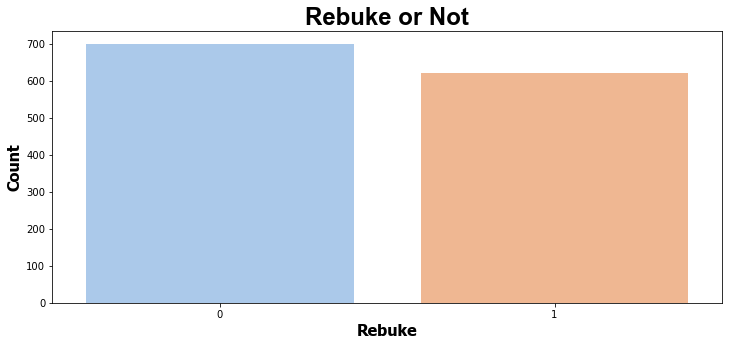

In [48]:
plt.subplots(figsize=(12,5))
data1_viz = sns.countplot(data1["Rebuke"], palette = "pastel")
plt.title("Rebuke or Not", fontname = 'Arial', fontsize = 24, fontweight="bold")
plt.xlabel("Rebuke", fontname = 'Tahoma', fontsize = 16, fontweight="bold")
plt.ylabel("Count", fontname = 'Tahoma', fontsize = 16, fontweight="bold")
plt.show()

### <font color='green'>2. Predictive Model Training & Testing

### a. Model Features and Labels

To train a dataset using the Scikit-Learn library, the dataset needs to be separated into Features and Labels/Targets. The Feature variable will consist of a variable declared as X and [Rebuke] is a Target variable declared as y. Use the drop() function to remove the [Rebuke] column from the dataset in variable X.

In [51]:
X = data1.drop(["Rebuke"], axis = 1)
y = data1["Rebuke"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1319, 26)
Shape of y: (1319,)


### b. Determining Training and Testing Dataset

Used the train_test_split function of the sklearn selection sub-library to convert the dataset from dataframes into array format. Comparison of Train - Test is 75:25 (75% data used for training and 25% data for testing). Here is also used random_state for controls the shuffling applied to the data before applying the split.

In [52]:
from sklearn.model_selection import train_test_split

# splitting the X, and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (989, 26)
Shape of y_train : (989,)
Shape of X_test : (330, 26)
Shape of y_test : (330,)


### c. Training Model using Classifier

Because the problem in this dataset is classification, we use DecisionTreeClassification and name it "model". Then use the .fit() and X_train, y_train functions to train that classifier with the training dataset. Next we use this model to predict the LABEL of the testing dataset (X_test), using the .predict() function.

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(330,)


### d. Evaluate Predictive Data Using Confusion Matrix

For evaluation of model performance, each algorithm has different metrics. The simplest metric to check model performance is accuracy. However, in many real problems, accuracy alone is not enough. Another method used is the Confusion Matrix. The Confusion Matrix represents the comparison of predictions and real LABELs from the test dataset generated by the ML algorithm. Here's the template for the Confusion Matrix:

`True Positive (TP)`: If it is predicted to be rebuked (Positive), and true to be rebuked (Positive).

`True Negative (TN)`: If it is predicted not to be rebuked (Negative) and actually not to be rebuked (Negative).

`False Positive (FP)`: If it is predicted to be rebuked (Positive), but it turns out that it is not actually rebuked (Negative).

`False Negative (FN)`: If it is predicted that you will not get a rebuke (Negative), but it turns out that you actually get a rebuke (Positive).

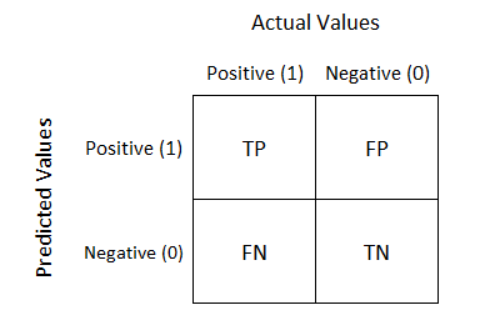

In [57]:
from sklearn.metrics import confusion_matrix

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :',  model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
Cm = confusion_matrix(y_test, y_pred)
print(Cm)

Training Accuracy : 1.0
Testing Accuracy : 0.9878787878787879

Confusion matrix:
[[177   4]
 [  0 149]]


### e. Show Prediction Result Data with Classification Report

Based on the results of the confusion matrix, we can use the classification_report function of the sub-library metrics from sklearn. In the classification_report there are 4 important data that are used as a reference in determining how well our predictive model works.

* `Accuracy` = (TP + TN ) / (TP+FP+FN+TN)
* `Precision` = (TP) / (TP+FP)
* `Recall` = (TP) / (TP + FN)
* `F1 Score` = 2 * (Recall*Precission) / (Recall + Precision)

If the dataset has a balanced number of False Negative and False Positive data (Symmetric), then you can use Accuracy, but if it is not balanced, then you should use F1-Score. In a problem, to compare the level of accuracy of the data between the predicted results and the actual results when the value is TRUE / 1, the Precision metric is used. On the other hand, if you want to see a comparison of the accuracy of the data when it is FALSE/0, the Recall metric is used.

In [58]:
from sklearn.metrics import classification_report

# classification report
print('\nClassification report:')
Cr = classification_report(y_test, y_pred)
print(Cr)


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       181
           1       0.97      1.00      0.99       149

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



## B. Acceptance as Full Time Worker For Internship Workers

### <font color='magenta'>1. Data Pre-processing
    a. Filtering the Data where only Full time workers in the data and delete unnecessary data
    b. Data Exploration
    c. Missing Value Data Checking
    d. Data Conversion into Numerical Values
    e. Scaling Data
    f. Showing Correlation between each data
    g. Data Visualizing
### <font color='magenta'>2. Predictive Model Training & Testing
    a. Model Features and Labels
    b. Determining Training and Testing Dataset
    c. Training Model using Classifier
    d. Evaluate Predictive Data Using Confusion Matrix
    e. Show Prediction Result Data with Classification Report   

### <font color='magenta'>1. Data Pre-processing

### a. Filtering the Data where only Internship workers in the data and delete unnecessary data

In [84]:
data2 = data[data["JobType"] == "Internship"]
data2 = data2.drop(["Rebuke","EmployeeCount","JobType","EmployeeKeyNumber"], axis = 1)
data2

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,AcceptedAsEmployee
0,25,Bachelor,0,1,23,Research & Analytics,Data Scientist Intern,185579,3878601,3,...,1,1,4,17,1,84.00,77.4250,-7.65,51.258333,True
1,22,Bachelor,0,1,39,IT,Front End Developer Intern,305775,6390698,1,...,1,0,3,30,3,73.75,71.2500,-18.00,42.333333,True
3,20,College,0,0,11,IT,Back End Developer Intern,295640,6178876,1,...,4,1,3,2,2,78.00,62.5625,0.00,46.854167,True
4,25,Bachelor,0,0,47,Digital Marketing,Copywriter Intern,161812,3381871,2,...,2,1,2,54,2,62.25,48.8375,-32.40,26.229167,True
5,23,Bachelor,0,1,7,Research & Analytics,Research & Development Intern,185920,3885728,4,...,3,0,3,35,1,73.00,44.4250,-28.00,29.808333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,30,Bachelor,0,0,7,Research & Analytics,Data Engineer Intern,404156,8446860,2,...,3,0,1,41,1,54.50,35.1250,-32.80,18.941667,False
2124,21,College,0,1,37,Research & Analytics,Data Analyst Intern,189641,3963497,2,...,1,0,4,40,0,59.50,19.7625,-24.00,18.420833,False
2127,28,Bachelor,0,0,23,Research & Analytics,Research & Development Intern,184275,3851348,2,...,1,1,3,50,2,61.00,32.6000,-40.00,17.866667,False
2133,29,Bachelor,0,0,31,Research & Analytics,Data Engineer Intern,404933,8463100,1,...,1,1,3,47,1,47.00,33.8875,-28.20,17.562500,False


### b. Data Exploration

In [85]:
print("Dataset Information:\n", data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 2137
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       820 non-null    int64  
 1   Education                 820 non-null    object 
 2   ForeignEmployee           820 non-null    int64  
 3   Male                      820 non-null    int64  
 4   DistanceFromHome          820 non-null    int64  
 5   Department                820 non-null    object 
 6   Division                  820 non-null    object 
 7   DailyIncome               820 non-null    int64  
 8   MonthIncome               820 non-null    int64  
 9   NumberofCompany           820 non-null    int64  
 10  EnvironmentSatisfaction   820 non-null    int64  
 11  YearInCompany             820 non-null    int64  
 12  YearInCurrentRole         820 non-null    int64  
 13  JobInvolvement            820 non-null    int64  
 14  JobSatisf

In [86]:
print("Dataset Descriptive Statistic:\n", data2.describe())

Dataset Descriptive Statistic:
               Age  ForeignEmployee        Male  DistanceFromHome  \
count  820.000000       820.000000  820.000000        820.000000   
mean    22.907317         0.085366    0.518293         35.935366   
std      3.729065         0.279596    0.499970         19.901270   
min     17.000000         0.000000    0.000000          1.000000   
25%     20.000000         0.000000    0.000000         19.000000   
50%     22.000000         0.000000    1.000000         36.000000   
75%     26.000000         0.000000    1.000000         53.000000   
max     30.000000         1.000000    1.000000         70.000000   

         DailyIncome   MonthIncome  NumberofCompany  EnvironmentSatisfaction  \
count     820.000000  8.200000e+02       820.000000               820.000000   
mean   226712.195122  4.738285e+06         2.087805                 3.506098   
std     71983.220990  1.504449e+06         1.064282                 1.224979   
min    139768.000000  2.921151e+06 

In [87]:
print("Dataset Size:\n", data2.shape)

Dataset Size:
 (820, 27)


### c. Missing Value Data Checking

In [28]:
print("Total Missing Value:\n", data2.isnull().sum().sum())

Total Missing Value:
 0


### d. Data Conversion Into Numerical Value

In [29]:
# Convert feature/column 'Education', 'Department', 'Division', and 'AcceptedAsEmployee'
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

data2['Education'] = LE.fit_transform(data2['Education'])
print(LE.classes_)
print(np.sort(data2['Education'].unique()))

['Bachelor' 'Below College' 'College' 'Master']
[0 1 2 3]


In [30]:
data2['Department'] = LE.fit_transform(data2['Department'])
print(LE.classes_)
print(np.sort(data2['Department'].unique()))

['Digital Marketing' 'IT' 'Research & Analytics']
[0 1 2]


In [31]:
data2['Division'] = LE.fit_transform(data2['Division'])
print(LE.classes_)
print(np.sort(data2['Division'].unique()))

['Back End Developer Intern' 'Copywriter Intern' 'Data Analyst Intern'
 'Data Engineer Intern' 'Data Scientist Intern' 'Digital Marketer Intern'
 'Digital Sales Intern' 'Front End Developer Intern'
 'Graphic Designer Intern' 'IT Helpdesk Intern'
 'IT Support / Maintenance Intern' 'Research & Development Intern'
 'Social Media Specialist Intern']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [32]:
data2['AcceptedAsEmployee'] = LE.fit_transform(data2['AcceptedAsEmployee'])
print(LE.classes_)
print(np.sort(data2['AcceptedAsEmployee'].unique()))

[False  True]
[0 1]


In [79]:
#Dataset after data conversion

data2

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,AcceptedAsEmployee
0,0.615385,0,0,1,0.318841,1.0,0.333333,0.172742,0.172742,0.75,...,0.25,1.0,1.000000,0.293103,0.333333,0.708487,0.779355,0.835129,0.758772,1
1,0.384615,0,0,1,0.550725,0.5,0.583333,0.625971,0.625972,0.25,...,0.25,0.0,0.666667,0.517241,1.000000,0.557196,0.695895,0.612069,0.558342,1
3,0.230769,2,0,0,0.144928,0.5,0.000000,0.587755,0.587755,0.25,...,1.00,1.0,0.666667,0.034483,0.666667,0.619926,0.578476,1.000000,0.659867,1
4,0.615385,0,0,0,0.666667,0.0,0.083333,0.083122,0.083123,0.50,...,0.50,1.0,0.333333,0.931034,0.666667,0.387454,0.392972,0.301724,0.196688,1
5,0.461538,0,0,1,0.086957,1.0,0.916667,0.174028,0.174028,1.00,...,0.75,0.0,0.666667,0.603448,0.333333,0.546125,0.333333,0.396552,0.277066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,1.000000,0,0,0,0.086957,1.0,0.250000,0.996942,0.996942,0.50,...,0.75,0.0,0.000000,0.706897,0.333333,0.273063,0.207636,0.293103,0.033031,0
2124,0.307692,2,0,1,0.521739,1.0,0.166667,0.188059,0.188059,0.50,...,0.25,0.0,1.000000,0.689655,0.000000,0.346863,0.000000,0.482759,0.021334,0
2127,0.846154,0,0,0,0.318841,1.0,0.916667,0.167825,0.167825,0.50,...,0.25,1.0,0.666667,0.862069,0.666667,0.369004,0.173509,0.137931,0.008889,0
2133,0.923077,0,0,0,0.434783,1.0,0.250000,0.999872,0.999872,0.25,...,0.25,1.0,0.666667,0.810345,0.333333,0.162362,0.190911,0.392241,0.002059,0


### e. Scaling Data

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaling_column = ["Age","DistanceFromHome","Department","Division","DailyIncome","MonthIncome","NumberofCompany","EnvironmentSatisfaction","YearInCompany","YearInCurrentRole","JobInvolvement","JobSatisfaction","PerformanceRating","RelationshipSatisfaction","TrainingThisYear","YearsWithCurrManager","WorkLifeBalance","TotalOvertimePerWeek","AverageLatenessPerMonth","PersonalScore","PerformanceTotalScore","Indisciplinary","MainScore"]
data2[scaling_column] = scaler.fit_transform(data2[scaling_column])
print(data2[scaling_column].describe().T[['min','max']])

                          min  max
Age                       0.0  1.0
DistanceFromHome          0.0  1.0
Department                0.0  1.0
Division                  0.0  1.0
DailyIncome               0.0  1.0
MonthIncome               0.0  1.0
NumberofCompany           0.0  1.0
EnvironmentSatisfaction   0.0  1.0
YearInCompany             0.0  1.0
YearInCurrentRole         0.0  1.0
JobInvolvement            0.0  1.0
JobSatisfaction           0.0  1.0
PerformanceRating         0.0  1.0
RelationshipSatisfaction  0.0  1.0
TrainingThisYear          0.0  1.0
YearsWithCurrManager      0.0  1.0
WorkLifeBalance           0.0  1.0
TotalOvertimePerWeek      0.0  1.0
AverageLatenessPerMonth   0.0  1.0
PersonalScore             0.0  1.0
PerformanceTotalScore     0.0  1.0
Indisciplinary            0.0  1.0
MainScore                 0.0  1.0


In [60]:
data2

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,AcceptedAsEmployee
0,0.615385,0,0,1,0.318841,1.0,0.333333,0.172742,0.172742,0.75,...,0.25,1.0,1.000000,0.293103,0.333333,0.708487,0.779355,0.835129,0.758772,1
1,0.384615,0,0,1,0.550725,0.5,0.583333,0.625971,0.625972,0.25,...,0.25,0.0,0.666667,0.517241,1.000000,0.557196,0.695895,0.612069,0.558342,1
3,0.230769,2,0,0,0.144928,0.5,0.000000,0.587755,0.587755,0.25,...,1.00,1.0,0.666667,0.034483,0.666667,0.619926,0.578476,1.000000,0.659867,1
4,0.615385,0,0,0,0.666667,0.0,0.083333,0.083122,0.083123,0.50,...,0.50,1.0,0.333333,0.931034,0.666667,0.387454,0.392972,0.301724,0.196688,1
5,0.461538,0,0,1,0.086957,1.0,0.916667,0.174028,0.174028,1.00,...,0.75,0.0,0.666667,0.603448,0.333333,0.546125,0.333333,0.396552,0.277066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,1.000000,0,0,0,0.086957,1.0,0.250000,0.996942,0.996942,0.50,...,0.75,0.0,0.000000,0.706897,0.333333,0.273063,0.207636,0.293103,0.033031,0
2124,0.307692,2,0,1,0.521739,1.0,0.166667,0.188059,0.188059,0.50,...,0.25,0.0,1.000000,0.689655,0.000000,0.346863,0.000000,0.482759,0.021334,0
2127,0.846154,0,0,0,0.318841,1.0,0.916667,0.167825,0.167825,0.50,...,0.25,1.0,0.666667,0.862069,0.666667,0.369004,0.173509,0.137931,0.008889,0
2133,0.923077,0,0,0,0.434783,1.0,0.250000,0.999872,0.999872,0.25,...,0.25,1.0,0.666667,0.810345,0.333333,0.162362,0.190911,0.392241,0.002059,0


### f. Correlation Between Each Data

In [61]:
data2_correlation = data2.corr()
data2_correlation

,Age,Education,ForeignEmployee,Male,DistanceFromHome,Department,Division,DailyIncome,MonthIncome,NumberofCompany,...,TrainingThisYear,YearsWithCurrManager,WorkLifeBalance,AverageLatenessPerMonth,TotalOvertimePerWeek,PersonalScore,PerformanceTotalScore,Indisciplinary,MainScore,AcceptedAsEmployee
Age,1.000000,-0.823650,0.129390,0.000910,-0.003947,0.135861,-0.164125,0.219637,0.219637,0.367851,...,-0.011319,0.059833,-0.017953,0.056408,-0.020264,-0.044923,-0.001202,-0.056169,-0.052705,0.011031
Education,-0.823650,1.000000,-0.133573,0.034428,0.006692,-0.098374,0.205751,-0.228169,-0.228169,-0.339892,...,0.033532,-0.045592,0.017181,-0.057702,0.023162,0.045503,0.024775,0.063282,0.069797,0.000676
ForeignEmployee,0.129390,-0.133573,1.000000,0.006285,0.053657,0.053678,-0.009911,0.049591,0.049591,0.081465,...,-0.022482,-0.016571,-0.054890,-0.028884,-0.076844,0.024075,-0.088183,0.030137,-0.021158,-0.096398
Male,0.000910,0.034428,0.006285,1.000000,0.085711,0.049825,0.044750,-0.033352,-0.033352,0.047460,...,-0.006160,-0.016789,0.044327,-0.002303,0.006383,0.009312,0.000154,0.010671,0.010369,0.016697
DistanceFromHome,-0.003947,0.006692,0.053657,0.085711,1.000000,-0.032411,0.029247,0.009324,0.009324,0.049787,...,-0.031855,-0.014055,0.004061,0.239359,-0.008886,0.011583,0.010099,-0.141152,-0.061471,-0.093398
Department,0.135861,-0.098374,0.053678,0.049825,-0.032411,1.000000,-0.090653,0.240108,0.240108,0.044923,...,0.043284,0.027610,-0.000218,-0.033586,-0.037950,0.046551,-0.046261,0.041787,0.019691,0.031930
Division,-0.164125,0.205751,-0.009911,0.044750,0.029247,-0.090653,1.000000,-0.430161,-0.430161,-0.100279,...,-0.034153,-0.098533,-0.006644,-0.005758,0.014408,-0.041740,-0.009183,0.016601,-0.017875,-0.072420
DailyIncome,0.219637,-0.228169,0.049591,-0.033352,0.009324,0.240108,-0.430161,1.000000,1.000000,0.145306,...,0.000109,-0.183918,0.047566,-0.006799,-0.059576,-0.034484,-0.064807,0.004775,-0.051228,-0.020970
MonthIncome,0.219637,-0.228169,0.049591,-0.033352,0.009324,0.240108,-0.430161,1.000000,1.000000,0.145306,...,0.000109,-0.183918,0.047566,-0.006799,-0.059576,-0.034484,-0.064807,0.004775,-0.051228,-0.020970
NumberofCompany,0.367851,-0.339892,0.081465,0.047460,0.049787,0.044923,-0.100279,0.145306,0.145306,1.000000,...,-0.051495,-0.024877,-0.016460,0.033341,-0.001302,0.058328,0.011395,-0.025325,0.023079,-0.021143


### Results:

In the AcceptedAsEmployee column, the largest positive correlation occurs in the relationship between AcceptedAsEmployee and JobInvolvement (0.224350); while the biggest negative correlation occurs in the relationship between AcceptedAsEmployee and AverageLatenessPerMonth (-0.113068).

### g. Data Visualizing

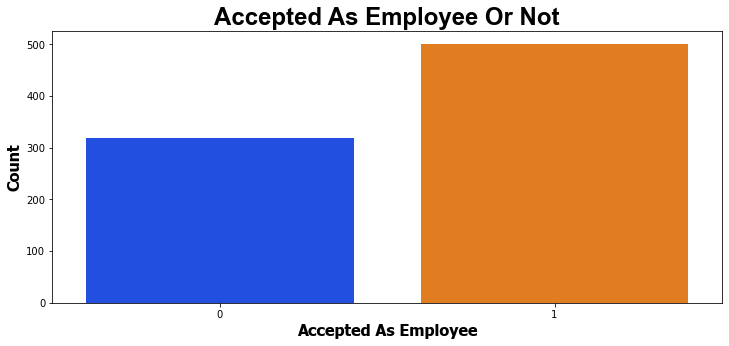

In [62]:
import seaborn as sns

plt.subplots(figsize=(12,5))
data2_viz = sns.countplot(data2["AcceptedAsEmployee"], palette = "bright")
plt.title("Accepted As Employee Or Not", fontname = 'Arial', fontsize = 24, fontweight="bold")
plt.xlabel("Accepted As Employee", fontname = 'Tahoma', fontsize = 16, fontweight="bold")
plt.ylabel("Count", fontname = 'Tahoma', fontsize = 16, fontweight="bold")
plt.show()

### <font color='magenta'>2. Model Training and Testing

### a. Model Features and Labels

In [63]:
x = data2.drop(["AcceptedAsEmployee"], axis = 1)
Y = data2["AcceptedAsEmployee"]

print("Shape of x:", X.shape)
print("Shape of Y:", y.shape)

Shape of x: (1319, 26)
Shape of Y: (1319,)


### b. Determining Training and Testing Dataset

In [64]:
from sklearn.model_selection import train_test_split
# splitting the x, and Y
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.1, random_state = 30)
print("Shape of x_train :", x_train.shape)
print("Shape of Y_train :", Y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of x_train : (738, 26)
Shape of Y_train : (738,)
Shape of x_test : (82, 26)
Shape of Y_test : (82,)


### c. Train Model Using Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model2 = DecisionTreeClassifier()
# Fit the classifier to the training data
model2 = model2.fit(x_train,Y_train)
# Apply the classifier/model to the test data
Y_pred = model2.predict(x_test)
print(Y_pred.shape)

(82,)


### d. Evaluate Predictive Data Using Confusion Matrix

`True Positive (TP)`: If it is predicted to be accepted as employee (Positive), and true to be accepted (Positive).

`True Negative (TN)`: If it is predicted not to be accepted as employee (Negative) and actually not to be accepted (Negative).

`False Positive (FP)`: If it is predicted to be accepted as employee (Positive), but it turns out that it is not actually accepted (Negative).

`False Negative (FN)`: If it is predicted that you will not get accepted as employee (Negative), but it turns out that you actually get accepted (Positive).

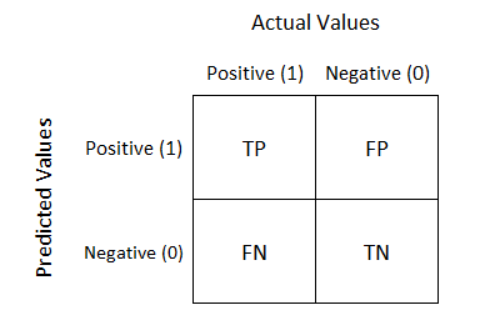

In [76]:
from sklearn.metrics import confusion_matrix

# evaluating the model
print('Training Accuracy :', model2.score(x_train, Y_train))
print('Testing Accuracy :',  model2.score(x_test, Y_test))

Cm2 = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", Cm2)

Training Accuracy : 1.0
Testing Accuracy : 0.7317073170731707
Confusion Matrix:
 [[22 15]
 [ 7 38]]


### e. Show Prediction Data Using Classification Report

In [77]:
from sklearn.metrics import classification_report

# classification report
Cr2 = classification_report(Y_test, Y_pred)
print('Classification report:\n', Cr2)

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        37
           1       0.72      0.84      0.78        45

    accuracy                           0.73        82
   macro avg       0.74      0.72      0.72        82
weighted avg       0.74      0.73      0.73        82



## C. Conclusion

### <font color='green'>Rebuke Model
      
<font color='black'>In the Rebuke Model, the accuracy of the model testing is 98.8%; with false positives occurred 4 times and there were no false negatives.

In the classification report, the precision value shows a value of 0.97 and a recall of 1; shows that this model is able to predict both employees who get and don't get rebuke with near perfect. The f1-score value of 0.99 makes this rebuke model able to predict employees who experience rebuke very well.

## C. Conclusion

### <font color='magenta'>Full Time Employee Acceptance for Intern Model
    
<font color='black'>In the Full Time Employee Acceptance for Intern model, the accuracy value of model testing is 76.8% with False Positive occurring in 15 data and False Negative occurring in 7 data.

Meanwhile, from the classification report in this model, the precision value is 0.72 and the recall is 0.84. This shows that this model has a tendency to predict better results in determining internship employees who do not pass. The f1-score model value of 0.78 indicates that this model is OKAY to determining whether or not Internship employees are accepted as Full-time employees.